# Randomized Condorcet Voting System (RCVS)

Formalised by [Lê Nguyên Hoang](https://www.linkedin.com/in/l%C3%AA-nguy%C3%AAn-hoang-a5494335) in [this paper](https://www.gerad.ca/en/papers/G-2014-74/view).

Presented in this video (in French) from his you tube channel [Science4All](https://www.youtube.com/channel/UC0NCbj8CxzeCGIF6sODJ-7A)

[![Video](./img/condorcet-winner.jpg)](https://www.youtube.com/watch?v=wKimU8jy2a8)


# Brief Description

## Ballot mechanism
It is a one round election.  
Each voter casts a ballot where they can order all or some of the candidates by decreasing order of preference.  
For example if a voter may vote 'B > A > D' in a election where candidates A, B, C, D run.  


## Tournement graph
Each ballot contains one or several preferences. In the example above it contains:  
B > A  
A > D  
B > D  
All such preference are aggregated in a preference table.  

This table has the following shape.  
The first column are the winners and the top row the losers.  

| W\L  | A | B | C | D |
|---|---|---|---|---|
| A | 0 | 6 | 4 | 2 |
| B | 9 | 0 | 8 | 3 |
| C | 5 | 2 | 0 | 10|
| D | 10| 9 | 8 | 0 |

For examples cell (D, A) = (4th row, 1st col) = 10 means that the ballots contains 10 instances of 'D > A'.  
Conversely cell (A, D) = (1st row, 4th col) = 2 means that the ballots contains 2 instances of 'A > D'.  
So D > A in duel.  

This preference table can be turned to a Tournament graph i.e. a directed graph where each candidate is a vertex and there is a directed edge from candidate X to candidate Y if and only if X > Y.  

This Tournament graph can also be represented by this Payoff table.  

| W\L  | A | B | C | D |
|---|---|---|---|---|
| A | 0 | -1 | -1 | -1 |
| B | 1 | 0 | 1 | -1 |
| C | 1 | -1 | 0 | 1 |
| D | 1 | 1 | -1 | 0 |

Each directed edge from candidate X to candidate Y is represented by +1 for (row=X, col=Y) and -1 for (row=Y, col=X), or 0 if nobody expressed preference about X relative to B or there is perfect equality between X and Y.  


## Condorcet Winner
This is the candidate that wins over any other in a two candidate election (**duel**).  
In other words, in the Tounament graph this is the candidate that has only outgoing edges.  
Note that this candidate may not exist.  The typical counter example is A > B > C where symbol '>' means 'wins over'.   

## Lottery
A **lottery** is a probability distribution for choosing a candidate.  
For example {A: 1/2, B: 1/4, C: 1/4}.  
If the probability is 100% for one candidate, e.g. {B: 1} then the lottery is deterministic.  
In this case the lottery boils down to the traditional deterministic choosing of a candidate.  
So a lottery is a natural extension of the Condorcet method to cases where a deterministic Condorcet winner does not exists.  

## Why introduce lotteries ?
Because in some cases there is no Condorcet winner i.e. a single candidate that defeats any other in a duel.  
The benefit of lotteries is that, as opposed to Condorcet winners, there is always **one unique best lottery** as Lê shows in his [paper](http://www.science4all.org/wp-content/uploads/RandomizedCondorcet.pdf) (*)  
Thus the new objective of the election process is to determine the best lottery from the ballots.  

(*) This is demonstrated only in the case of a complete Tournament graph i.e. any two candidates are connected. If the number of voters is great and the number of candidates reasonable, this is very likely to be the case.  


## How to rank lotteries ?
Lottery A is considered better or similar to a lottery B if on average i.e. according to the Tournament graph the candidate picked by Lottery A wins over the candidate picked by Lottery B.  

## Example
Imagine the ballot with the Tournament graph and Payoff table G above.  
Let us compare lottery P = {A: 1/2, B: 1/4, C: 1/4} and Q = {A: 1/2, B: 1/2}.  
Lotteries P and Q are like to opponents in the a game similar to [Paper-Rock-Scissor](https://en.wikipedia.org/wiki/Rock%E2%80%93paper%E2%80%93scissors).  
In this context the elements in payoff matrix G represent the gain for the player associated with 1st column W and symmetrically the loss for the player associated with 1st row L.  

We could run random simulations and count the winning candidates picked by P vs. Q.  
Instead we can simply determine the winning lottery from matrix G and P, Q expressed as corresponding vectors.  

$$\mathbf{P} = \begin{bmatrix}
1/2\\ 
1/4\\ 
1/4\\ 
0
\end{bmatrix}\quad 
\mathbf{Q} = \begin{bmatrix}
1/2\\ 
1/2\\ 
0\\ 
0
\end{bmatrix}\quad 
\mathbf{G} = \begin{bmatrix}
 0 & -1 & -1 & -1\\ 
 1 & 0 & 1 & -1\\ 
 1 & -1 & 0 & 1\\ 
 1 & 1 & -1 & 0
\end{bmatrix}
$$

In this case the payoff for player P is:  
$$\mathbf{P}^{T} \cdot \mathbf{G}\cdot \mathbf{Q} = -1/8 < 0$$
Consequently player/lottery Q wins over P.


## How to determine all the possible lotteries ?
This is a vast set and obviously sampling it is not the preferred way.   

Instead we can determine the **best lottery** by framing the problem as a two person zero sum game.  
Both players make moves simultaneously and the outcome of the game is given by a payoff matrix.  

In the general case such payoff matrix has the following shape:

$$\mathbf{A} = \begin{bmatrix}
 a_{11} & a_{12} & a_{13} & a_{14}\\ 
 a_{21} & a_{22} & a_{23} & a_{24}\\ 
 a_{31} & a_{32} & a_{33} & a_{34}\\ 
\end{bmatrix}
$$

Example:  
If Player 1 makes move $i=3$ and Player 2 makes move $j=2$ then Player 1 wins $a_{32}$ and Player loses $a_{32}$.    

Now let us assume Player 1 and Player 2 play with respective probabilities  
$$(p_i)_{i=1, 2, 3}$$
$$(q_i)_{i=1, 2, 3, 4}$$

From the point of view of Player 2 $(q_i)$ must be determined so as to minimize the maximum gain for Player 1:  

$$\min_\mathbf{q} \left \{ \max_i  \sum_{j=1}^{4} a_{ij}q_j \right \} \quad subject\ to \quad \sum_{j=1}^{4} q_j = 1, \quad \mathbf{q}\geq 0$$

Which is equivalent to:  

$$\min_{\mathbf{q}, v} v \quad subject\ to \quad \forall i \quad \sum_{j=1}^{4} a_{ij}q_j \leq v , \quad \sum_{j=1}^{4} q_j = 1, \quad \mathbf{q}\geq 0$$

If $v>0$ (else add constant to $a_{ij}$ so that $v>0$) and we define $x_j = q_j/v$ then the problem becomes:  

$$\min_{\mathbf{x}, v} v \quad subject\ to \quad \forall i \quad \sum_{j=1}^{4} a_{ij}x_j \leq 1 , \quad \sum_{j=1}^{4} x_j = 1/v, \quad \mathbf{q}\geq 0$$

Which is equivalent to:  

$$\max_\mathbf{x} \sum_{j=1}^{4} x_j \quad subject\ to \quad  \mathbf{A}\mathbf{x} \leq \mathbf{1} , \quad \mathbf{x}\geq 0$$


Similarly from Player 1 perspective $(p_i)$ must be determined so as to minimize the maximum gain for Player 2:  
The reasoning leads to the dual problem, where $v>0$ (else add constant to $a_{ij}$ so that $v>0$) and $y_j = p_j/v$ :  

$$\min_\mathbf{y} \sum_{j=1}^{3} y_j \quad subject\ to \quad  \mathbf{A}^T\mathbf{y} \geq \mathbf{1} , \quad \mathbf{y}\geq 0$$

In our case, which is less general, matrix $\mathbf{A}$ is symmetric.  

Thus the solutions of the direct and dual problems must give the same results, which is the **best lottery** i.e. the best probability distribution to select the winning candidate.  

## Nice Properties

A Condorcet winner is 'natural', meaning stable: If a referendum takes place immediately after an election (people don't have time to change opinions) then he will win it again (which is not the case of the usual two round election system). Thus arguably voting systems must be Condorcet compatible to be fair.  

In a certain class of voting systems based on pairwise comparisons of alternatives (which are arguably the only reliable way to express preferences - indeed giving grades is too subjective and prone to distortion), the RCVS is the only one to be Condorcet-proof. Condorcet-proof means that, when a Condorcet winner exists, it must be selected and no voter has incentives to misreport their preferences.  

Moreover when preferences have a one-dimensional structure, the RCVS is group-strategy-proof.

See [this paper](https://link.springer.com/article/10.1007/s00355-017-1031-2) for in depth analysis.

## Simulation

Now let us see some practical simulations.  
The function calls in this notebook are the tip of the iceberg.  
To read the underlying code check this [github repo](TBD).


# Election Simulation

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import string
import numpy as np

from rcvs.election import Election

## Create candidate population
Each Candidate is defined by:
+ A **proba_ranked** score (between 0 and 1): He/She will be ranked by a voter with this probability
+ A **popularity** score: For a voter each candidate's score is multiplied by a random number ([0, 1]), the result is the ranking index.

### Random

In [2]:
seed = 123456
np.random.seed(seed)

nb_candidate = 5
candidates = list(string.ascii_uppercase)[:nb_candidate]
proba_ranked = np.random.rand(nb_candidate)
popularity = np.random.rand(nb_candidate)
nb_voter = int(1e3)


### Manual

In [3]:
# nb_candidate = 7
# candidates = list(string.ascii_uppercase)[:nb_candidate]
# proba_ranked = np.array([0.95, 0.95, 0.95, 0.95, 0.6, 0.1, 0.1])
# popularity = np.array([0.75, 0.70, 0.60, 0.55, 0.95, 0.03, 0.01])
# nb_voter = int(1e3)


### Init Election object

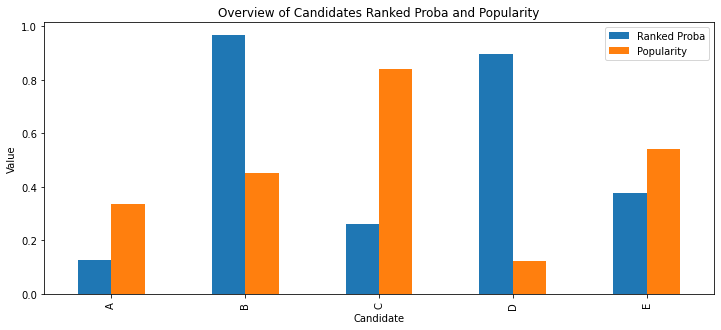

In [4]:
elect = Election(nb_candidate=nb_candidate, candidates=candidates, proba_ranked=proba_ranked, popularity=popularity, nb_voter=nb_voter)

elect.overview_candidates()

### Run Election
Each ballot
+ contains the index (from 1) of the chosen candidates by decreasing order of preference.  
+ is determined randomly from candidates' ranking probability and popularity
+ 0's represent unranked candidates


In [5]:
elect.run_election_from_popularity(seed=seed)

print(elect.ballot.shape)
elect.ballot

(1000, 5)


array([[2, 0, 0, 0, 0],
       [3, 2, 4, 0, 0],
       [2, 4, 0, 0, 0],
       ...,
       [2, 4, 0, 0, 0],
       [2, 4, 0, 0, 0],
       [3, 5, 2, 4, 0]], dtype=int64)

### Build Duels Table

In [6]:
elect.build_table_duels()
elect.df_duels

loser,A,B,C,D,E
winner,,,,,
A,0.0,40.0,4.0,80.0,15.0
B,62.0,0.0,57.0,755.0,158.0
C,23.0,190.0,0.0,210.0,77.0
D,17.0,122.0,13.0,0.0,38.0
E,24.0,209.0,26.0,296.0,0.0


### Consistency Check

In [7]:
elect.check_table_duels()

2416

### Build Payoff Table

In [8]:
elect.build_table_payoff()
elect.df_payoffs

loser,A,B,C,D,E
winner,,,,,
A,0.0,-1.0,-1.0,1.0,-1.0
B,1.0,0.0,-1.0,1.0,-1.0
C,1.0,1.0,0.0,1.0,1.0
D,-1.0,-1.0,-1.0,0.0,-1.0
E,1.0,1.0,-1.0,1.0,0.0


In [9]:
elect.get_best_lottery()
elect.best_lottery

{'A': 0.0, 'B': 0.0, 'C': 1.0, 'D': 0.0, 'E': 0.0}

# Election Graph
+ The Best Lottery probabilities are shown next to the nodes if strictly positive.
+ **Potential winners** i.e. candidates with strictly positive probabilities are circled.
+ If there is a **Condorcet Winner**, it is twice circled.

In [10]:
elect.build_graph_data()
elect.build_graph_html(linkDistance=400, width=960, height=700, saved=True)
elect.plot_graph()

# Election results from payoff matrix

### Paper-Scissor-Stone Game

In [11]:
elect2 = Election(3, ['A', 'B', 'C'], None, None, None)
elect2.payoffs = np.array([[0, -1, 1], [1, 0, -1], [-1, 1, 0]])

elect2.get_best_lottery()
elect2.build_graph_data()
elect2.build_graph_html(linkDistance=200, width=960, height=400, saved=True)
elect2.plot_graph()

### Paper-Scissor-Stone-Well Game

In [12]:
elect3 = Election(4, ['A', 'B', 'C', 'D'], None, None, None)
elect3.payoffs = np.array([[0, 1, -1, 1], [-1, 0, 1, -1], [1, -1, 0, 1], [-1, 1, -1, 0]])

elect3.get_best_lottery()
elect3.build_graph_data()
elect3.build_graph_html(linkDistance=200, width=960, height=400, saved=True)
elect3.plot_graph()

### Test Game

In [13]:
ballot = ((1, 2, 3, 4, 5), (5, (4, 3), 2, 1), ((4, 5), 1, 2, 3))
elect = Election.run_election_from_ballot(ballot)

elect.get_best_lottery()
elect.build_graph_data()
elect.build_graph_html(linkDistance=200, width=960, height=400, saved=True)
elect.plot_graph()

### Test with name instead of number

In [14]:
ballot = (("Luc", "Han", "Chewie", "Yoda", "Ben"), ("Ben", ("Yoda", "Chewie"), "Han", "Luc"), (("Yoda", "Ben"), "Luc", "Han", "Chewie"))
elect = Election.run_election_from_ballot(ballot)

elect.get_best_lottery()
elect.build_graph_data()
elect.build_graph_html(linkDistance=200, width=960, height=400, saved=True)
elect.plot_graph()